## XSBench  

Compiler: `clang`  
flags: `-std=gnu99 -g -pg -O3`  
libs: `-lm`  
run parameters: `-t 1` (Serial Run)  
On Intel(R) Xeon(R) CPU E5-2699 v4 @ 2.20GHz (Broadwell)

XSBench spent 80.2% of its time in loop at XSutils.c:59. 
```c
	// Begins binary search	             // Conditional Branch Misprediction Rate
	while( max >= min )                       // 63.06%              
	{
		mid = min + floor( (max-min) / 2.0);  // 44.76%. Should be next line?
		if( A[mid].energy < quarry )          // 0.37%.  ??
			min = mid+1;
        else if( A[mid].energy > quarry )     // 89.06%
			max = mid-1;
		else
			return mid;
	}
```
#### While Loop Conditional Branch Breakdown
91.9% of the total branch instructions are from this loop. 1.38e+11 Instructions  
Of these instructions 27.7% are conditional branch instructions. 3.83e+10 Instructions  
Of the conditional branch instructions 24.7% are mispredicted.  5.62e+9 Instructions


#### While Loop Instruction Breakdown

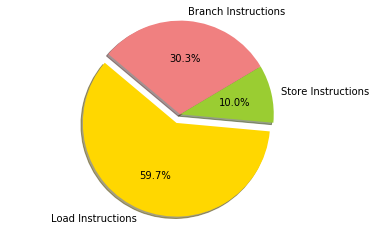

In [15]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Load Instructions', 'Store Instructions', 'Branch Instructions'
sizes = [1.16, .194, .590]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

plt.title = "While Loop"
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

---

### Aggregate Branch Instructions.  
Total Branch Instructions: 1.51e+11.  
Conditional Branch Instructions: 4.51e+10. 
29.7% of Branch Instructions are Conditional.  
Of the 4.51e+10 Conditional Branch Instructions, 3.44e+10 are Not Taken.  
76% of Conditional Branch Instructions are Not Taken (22.8% of Total Branch Instructions are Not Taken).  
Of the 4.51e+10 Conditional Branch Instructions, 6.68e+09 are Mispredicted.  
14.8% of Conditional Branch Instructions are Mispredicted (1.5% of Total Branch Instructions are Mispredicted).  

---


### Instruction Run  
1.38e+11 Load Instructions.  
2.22e+10 Store Instructions.  
6.50e+10 Branch Instructions.

1.40e+11 Instructions Completed.